<a href="https://colab.research.google.com/github/chenboju/MachineLearning/blob/main/%E5%B0%8F%E7%99%BD%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
print(data)
#y=w*x+b
x=data["YearsExperience"]
y=data["Salary"]


    YearsExperience  Salary
0               0.3    36.2
1               0.6    36.6
2               0.8    42.8
3               1.1    39.3
4               1.3    46.2
5               1.5    37.7
6               2.0    43.5
7               2.2    39.8
8               2.9    56.6
9               3.0    60.1
10              3.2    54.4
11              3.2    64.4
12              3.7    57.1
13              3.9    63.2
14              4.0    55.7
15              4.0    56.9
16              4.1    57.0
17              4.5    61.1
18              4.9    67.9
19              5.1    66.0
20              5.3    83.0
21              5.9    81.3
22              6.0    93.9
23              6.8    91.7
24              7.1    98.2
25              7.9   101.3
26              8.2   113.8
27              8.7   109.4
28              9.0   105.5
29              9.5   116.9
30              9.6   112.6
31             10.3   122.3
32             10.5   121.8


In [22]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=99f46cbe99249b113018c994d1d73dc4b1d0c068ec73c59b5c307dbb28359550
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

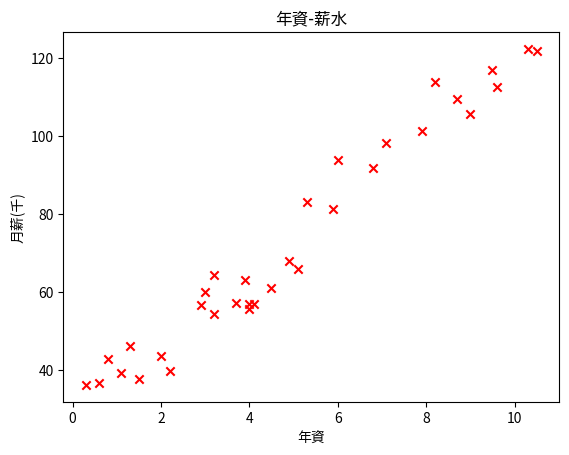

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
plt.show()

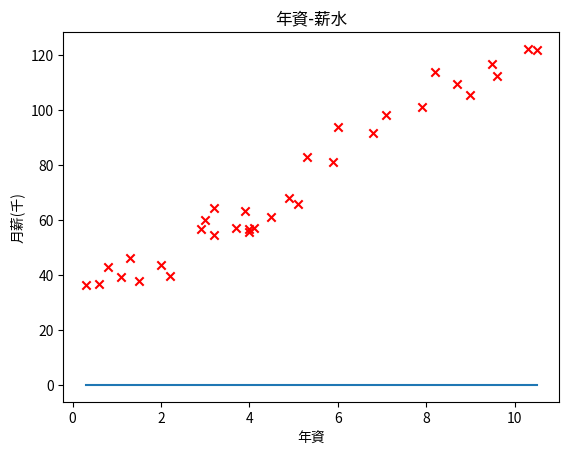

In [26]:
w=0
b=0
y_pred=x*w+b
plt.plot(x,y_pred)
plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
plt.show()

In [35]:
def plot_pred(w,b):
  y_pred=x*w+b
  plt.plot(x,y_pred,color="blue",label="預測縣")
  plt.scatter(x, y, marker="x", color="red",label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0,12])
  plt.ylim([0,140])
  plt.legend()
  plt.show()

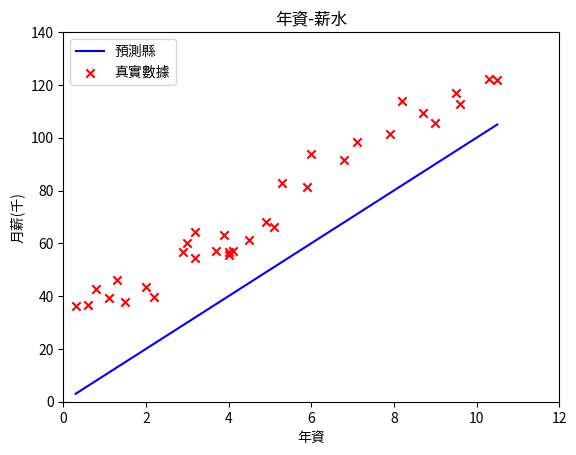

In [40]:
#plot_pred(w,b):
plot_pred(10,0)

In [47]:
from ipywidgets import interact
interact(plot_pred,w=(-100,100,5),b=(-100,100,5))

interactive(children=(IntSlider(value=0, description='w', min=-100, step=5), IntSlider(value=0, description='b…

<function __main__.plot_pred(w, b)>

In [52]:
#cost function=cost= (真實數據-預測值 )^2
# y_pred=預測值 y=真實資料
w=10
b=0
y_pred =w*x+b
cost=(y-y_pred)**2
print(cost)
print(cost.sum())
print(cost.sum()/len(x))

0     1102.24
1      936.36
2     1211.04
3      800.89
4     1102.24
5      515.29
6      552.25
7      316.84
8      761.76
9      906.01
10     501.76
11    1049.76
12     404.01
13     585.64
14     246.49
15     285.61
16     256.00
17     259.21
18     357.21
19     225.00
20     900.00
21     497.29
22    1149.21
23     561.69
24     739.84
25     497.29
26    1011.24
27     501.76
28     240.25
29     479.61
30     275.56
31     372.49
32     282.24
dtype: float64
19884.080000000005
602.547878787879


In [64]:
def total_cost(x,y,w,b):
  y_pred =w*x+b
  cost=(y-y_pred)**2
  # print(cost)
  # print(cost.sum())
  # print(cost.sum()/len(x))
  cost=cost.sum()/len(x)

  return cost

In [56]:
cost(x,y,10,0)

602.547878787879

In [71]:
#b=o w=-100~100 cost=??
costs=[]
for w in range(-100,101):
  cost=total_cost(x,y,w,0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393